# Assignment 6: Weather
***

Author: Filipe Carvalho

Task: Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

In [3]:
# Import modules

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

## Getting Data

Read in the data from link: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [4]:
# Read in dataframe and skip

url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

df = pd.read_csv(url,skiprows=22)

df.head()

/var/folders/rk/fh00kl713wq4442gfb60yzk40000gn/T/ipykernel_31967/1055468124.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url,skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [5]:
# Confirming data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

In [6]:
# Getting some insight of the statistics of the variable data

df.describe()

,ind,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,ind.3,ind.4,sun
count,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000
mean,0.469512,0.021067,8.762963,0.033491,7.811541,6.712935,10.207989,87.964403,2.001280,2.001320,0.126019
std,0.986484,0.143945,4.604485,0.228352,4.216243,4.378035,3.009784,12.124489,0.092767,0.094699,0.366059
min,0.000000,0.000000,-6.900000,0.000000,-7.300000,-11.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.400000,0.000000,4.700000,3.500000,7.800000,82.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,8.800000,0.000000,8.000000,7.000000,10.000000,92.000000,2.000000,2.000000,0.000000
75%,0.000000,0.000000,12.000000,0.000000,11.000000,10.000000,12.200000,97.000000,2.000000,2.000000,0.000000
max,8.000000,2.000000,28.500000,6.000000,23.800000,22.500000,27.200000,100.000000,7.000000,7.000000,4.900000


In [7]:
# Confirm the data type in each column

df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

df['date']

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
248389   2024-11-30 20:00:00
248390   2024-11-30 21:00:00
248391   2024-11-30 22:00:00
248392   2024-11-30 23:00:00
248393   2024-12-01 00:00:00
Name: date, Length: 248394, dtype: datetime64[ns]

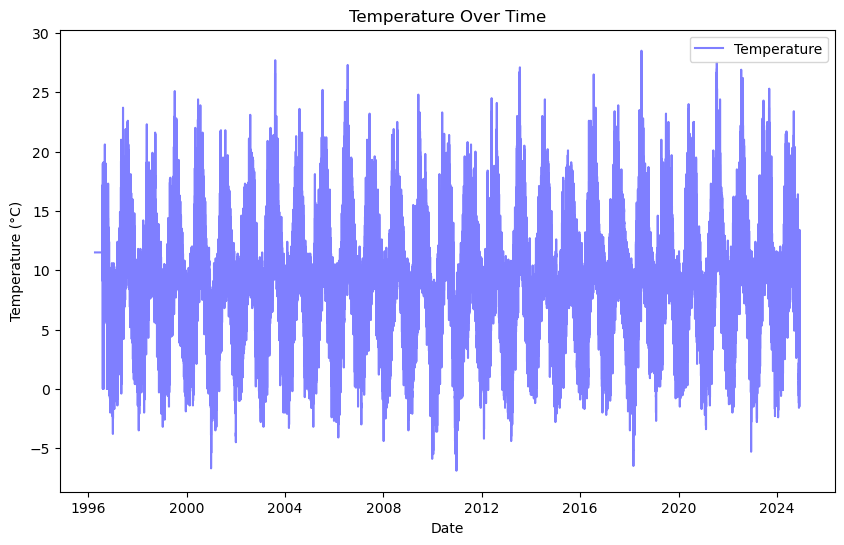

In [8]:
# Plotting the temperature timeline

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temp'], color='blue', alpha=0.5, label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

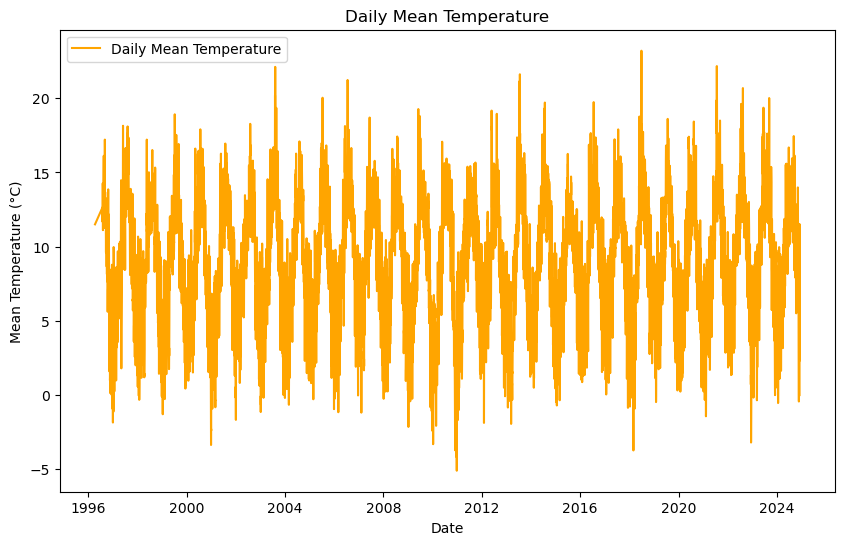

In [10]:
# Calculate the mean temperature each day

daily_mean_temp = df.groupby(df['date'].dt.date)['temp'].mean()

# Plot the mean temperature each day
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, color='orange', label='Daily Mean Temperature')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

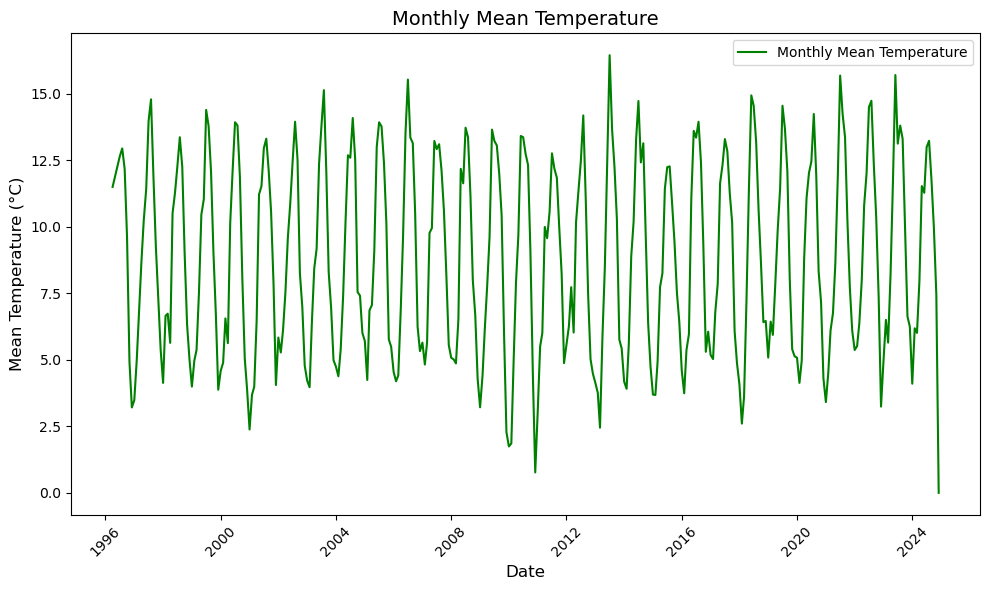

In [11]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a 'month_year' column as a string in the format 'Month-Year'
df['month_year'] = df['date'].dt.strftime('%b-%Y')

# Calculate the mean temperature each month
monthly_mean_temp = df.groupby('month_year')['temp'].mean()

# Ensure 'month_year' is a datetime type
monthly_mean_temp.index = pd.to_datetime(monthly_mean_temp.index, format='%b-%Y')

# Sort by date (if not already sorted)
monthly_mean_temp = monthly_mean_temp.sort_index()

# Plot the mean temperature for each month
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_temp.index, monthly_mean_temp.values, color='green', label='Monthly Mean Temperature')

# Improve x-axis formatting
plt.title('Monthly Mean Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.legend()
plt.tight_layout()  # Ensure everything fits in the plot area
plt.show()

In [22]:
df['wdsp'].head(5),df['date'].head(5)

(0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: wdsp, dtype: float64,
 0   1996-04-10 14:00:00
 1   1996-07-31 08:00:00
 2   1996-07-31 09:00:00
 3   1996-07-31 10:00:00
 4   1996-07-31 11:00:00
 Name: date, dtype: datetime64[ns])

In [27]:
# Get the count of each unique value in the 'wdsp' column
wdsp_counts = df['wdsp'].value_counts()

# Sort the counts in ascending order
wdsp_counts_sorted = wdsp_counts.sort_index()

# Print the sorted result
print(wdsp_counts_sorted)

wdsp
0.0       410
1.0      1947
2.0      5014
3.0     10358
4.0     16553
5.0     21651
6.0     23442
7.0     22576
8.0     20498
9.0     19037
10.0    17636
11.0    15579
12.0    13981
13.0    11851
14.0    10171
15.0     8296
16.0     6554
17.0     5241
18.0     4277
19.0     3270
20.0     2537
21.0     1926
22.0     1538
23.0     1055
24.0      815
25.0      617
26.0      433
27.0      341
28.0      240
29.0      169
30.0      102
31.0       70
32.0       53
33.0       39
34.0       24
35.0        9
36.0        5
37.0        7
38.0        6
39.0        6
40.0        4
42.0        2
43.0        1
48.0        1
49.0        1
50.0        1
Name: count, dtype: int64


In [19]:
# Convert 'wdsp' column to numeric, setting errors='coerce' to turn invalid values into NaN
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

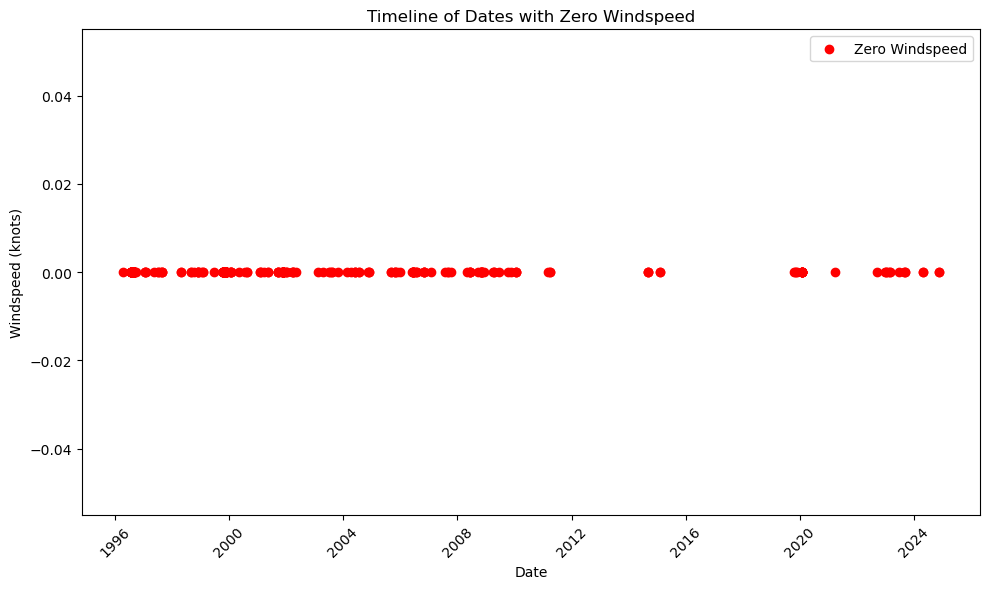

In [28]:
# Check for rows where 'wdsp' is 0
zero_wdsp_dates = df[df['wdsp'] == 0]

# Ensure there are rows to plot
if not zero_wdsp_dates.empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(zero_wdsp_dates['date'], zero_wdsp_dates['wdsp'], color='red', label='Zero Windspeed', zorder=5)
    plt.title('Timeline of Dates with Zero Windspeed')
    plt.xlabel('Date')
    plt.ylabel('Windspeed (knots)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No zero windspeed data to plot.")

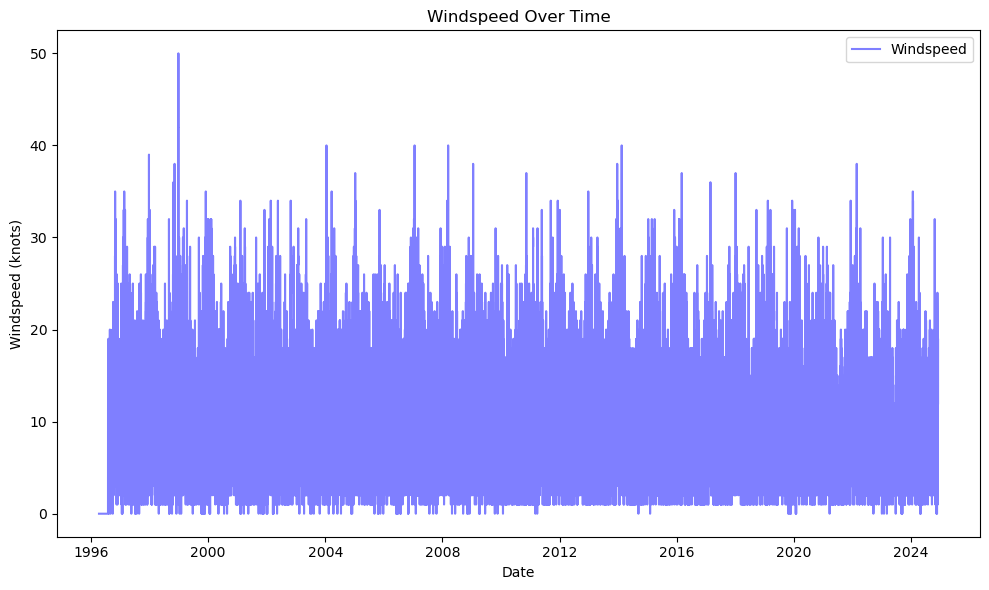

In [15]:

# Plot the Windspeed

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['wdsp'], color='blue', alpha=0.5, label='Windspeed')
plt.title('Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.tight_layout()
plt.show()

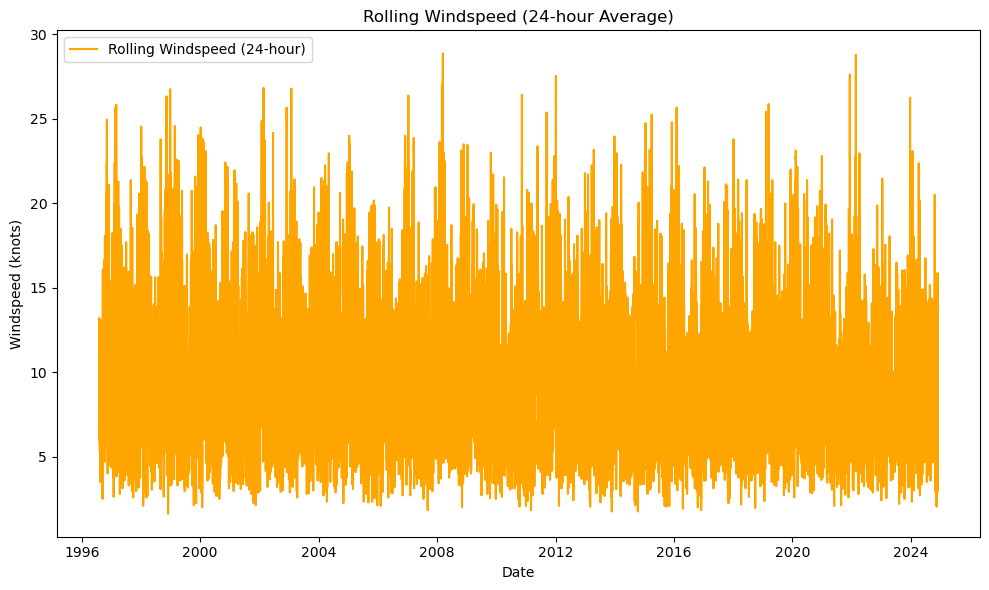

In [ ]:
# 2. Plot the Rolling Windspeed (24-hour)
df['rolling_wdsp'] = df['wdsp'].rolling(window=24, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['rolling_wdsp'], color='orange', label='Rolling Windspeed (24-hour)')
plt.title('Rolling Windspeed (24-hour Average)')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.tight_layout()
plt.show()

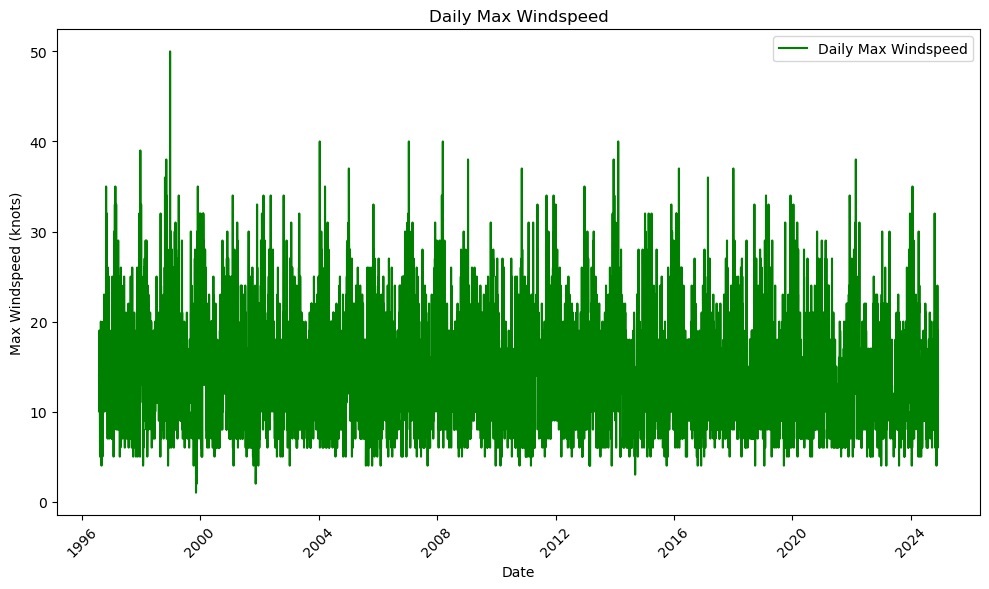

In [ ]:
# 3. Plot the Max Windspeed for Each Day
daily_max_wdsp = df.groupby('date_only')['wdsp'].max()

plt.figure(figsize=(10, 6))
plt.plot(daily_max_wdsp.index, daily_max_wdsp.values, color='green', label='Daily Max Windspeed')
plt.title('Daily Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Max Windspeed (knots)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

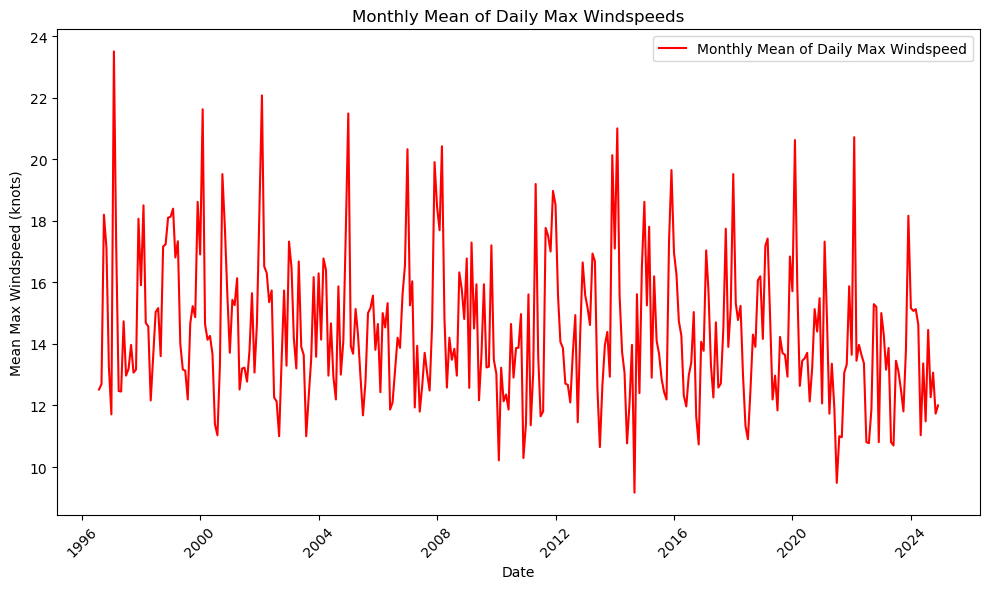

In [ ]:
# 4. Plot the Monthly Mean of Daily Max Windspeeds
# Create a 'month_year' column
df['month_year'] = df['date'].dt.to_period('M')

# Group by month and calculate mean of daily max windspeed
monthly_mean_daily_max_wdsp = daily_max_wdsp.groupby(pd.to_datetime(daily_max_wdsp.index).to_period('M')).mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_daily_max_wdsp.index.to_timestamp(), monthly_mean_daily_max_wdsp.values, color='red', label='Monthly Mean of Daily Max Windspeed')
plt.title('Monthly Mean of Daily Max Windspeeds')
plt.xlabel('Date')
plt.ylabel('Mean Max Windspeed (knots)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()